# Signals dan Sampling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pywt 
from scipy import signal
from obspy.core import UTCDateTime
from obspy.clients.syngine import Client

In [14]:
t = np.linspace(0, 10, 1000, endpoint=False)

sine_wave = np.sin(2 * np.pi * 5 * t)
square_wave = signal.square(2 * np.pi * 5 * t)
sawtooth_wave = signal.sawtooth(2 * np.pi * 5 * t)
triangle_wave = signal.sawtooth(2 * np.pi * 5 * t, 0.5)

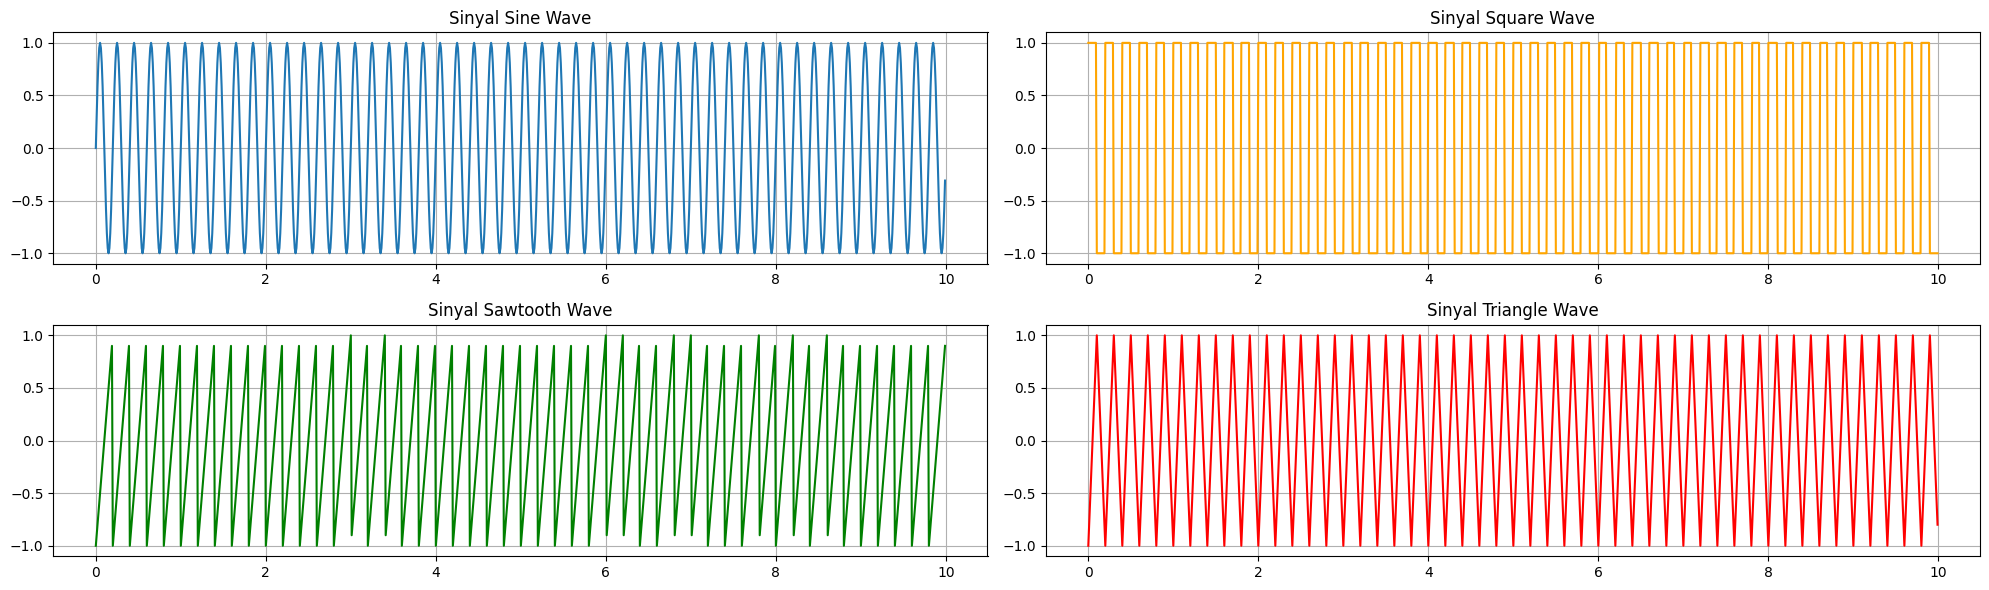

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))
axs[0,0].plot(t, sine_wave, label='Sinyal Sine Wave')
axs[0,0].set_title('Sinyal Sine Wave')
axs[0,0].grid(True)

axs[0,1].plot(t, square_wave, label='Sinyal Square Wave', color='orange')
axs[0,1].set_title('Sinyal Square Wave')
axs[0,1].grid(True)

axs[1,0].plot(t, sawtooth_wave, label='Sinyal Sawtooth Wave', color='green')
axs[1,0].set_title('Sinyal Sawtooth Wave')
axs[1,0].grid(True)

axs[1,1].plot(t, triangle_wave, label='Sinyal Triangle Wave', color='red')
axs[1,1].set_title('Sinyal Triangle Wave')
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

## Signal Real Life 

### Sinyal ECG (electrocardiography) - Sinyal Kontraksi Jantung

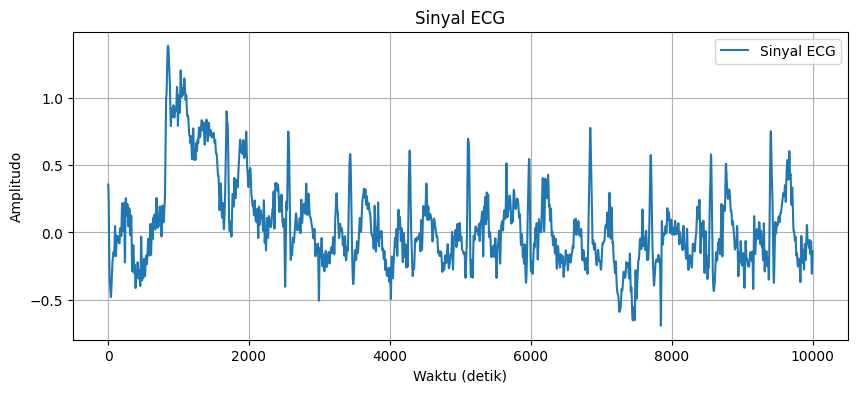

In [17]:
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=1000, heart_rate=70, noise=0.2, random_state=2025)

# plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal, label='Sinyal ECG')
plt.title('Sinyal ECG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

### Sinyal EEG (electroencephalography) - Sinyal Aktivitas Otak

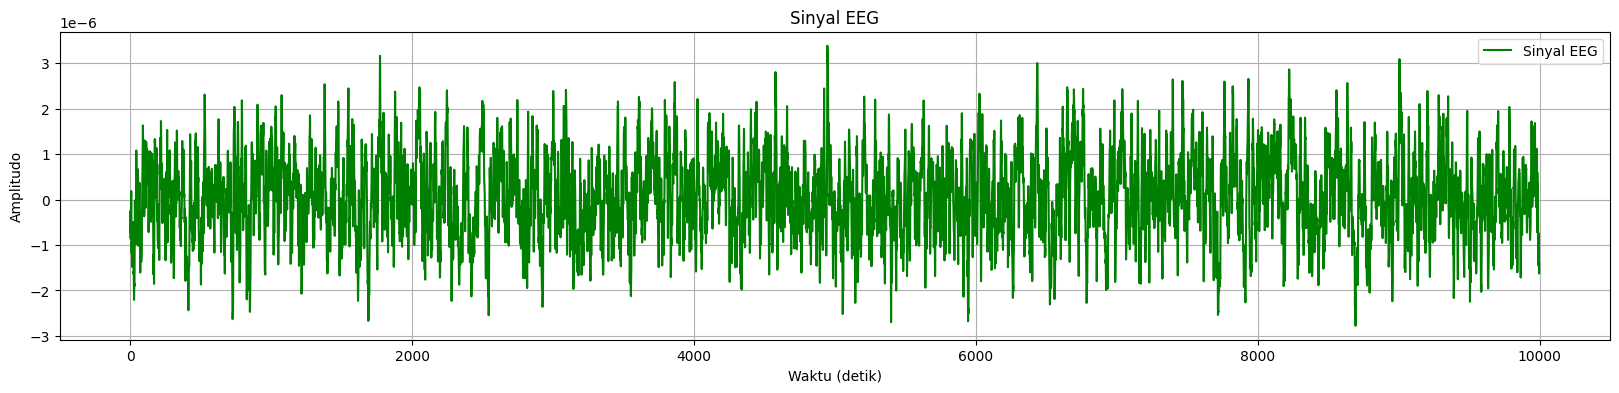

In [19]:
eeg_signal = nk.eeg_simulate(duration=10, sampling_rate=1000, noise=0.1, random_state=2025)

# plot the EEG signal
plt.figure(figsize=(20, 4))
plt.plot(eeg_signal, label='Sinyal EEG', color='green')
plt.title('Sinyal EEG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

## Sinyal Respirasi

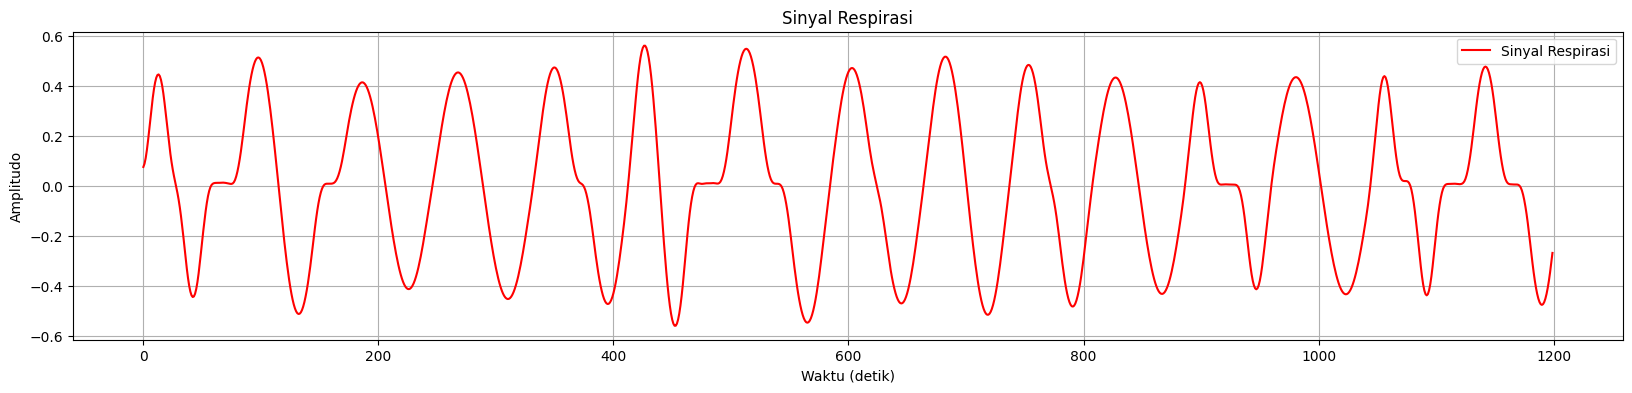

In [21]:
resp_signal = nk.rsp_simulate(duration=60, sampling_rate=20, noise=0.1, random_state=2025)

# plot the RSP signal
plt.figure(figsize=(20, 4))
plt.plot(resp_signal, label='Sinyal Respirasi', color='red')
plt.title('Sinyal Respirasi')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

## Sinyal EMG (electromyography) - Sinyal Aktivitas Otot

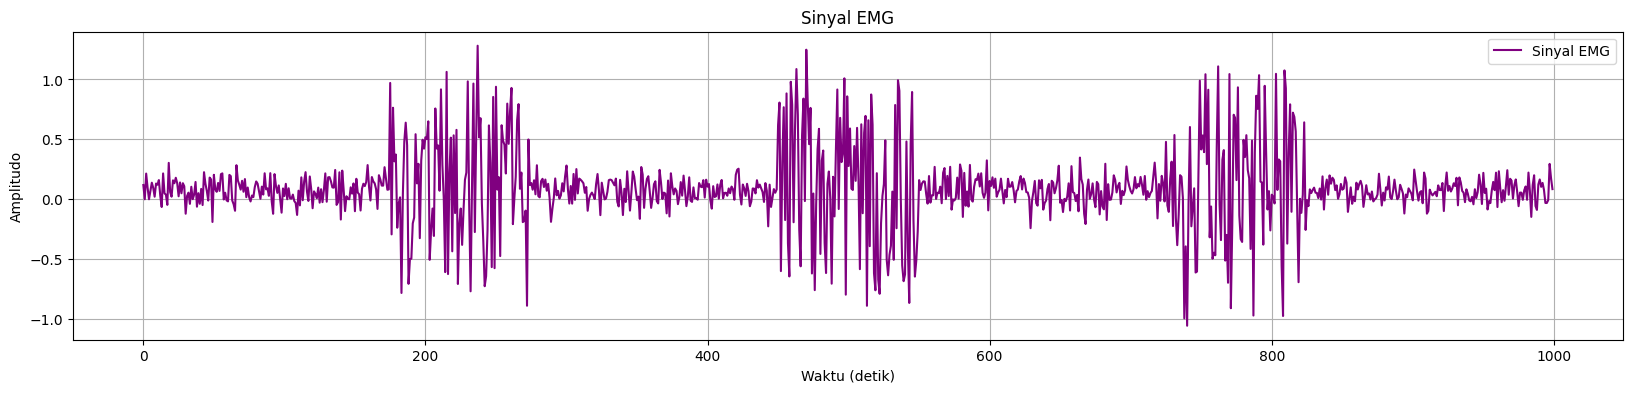

In [23]:
emg_signal = nk.emg_simulate(duration=10, sampling_rate=100, noise=0.1, random_state=2025, burst_number=3)

# plot the EMG signal
plt.figure(figsize=(20, 4))
plt.plot(emg_signal, label='Sinyal EMG', color='purple')
plt.title('Sinyal EMG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

## Sinyal Lingkungan
### Sinyal Seismik - Sinyal Getaran Bumi

In [24]:
client = Client()
origin_time = UTCDateTime("2023-10-01T00:00:00")

seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-5.440599180710982, sourcelongitude=105.27711959083427, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement") # Lampung

<Figure size 2000x600 with 0 Axes>

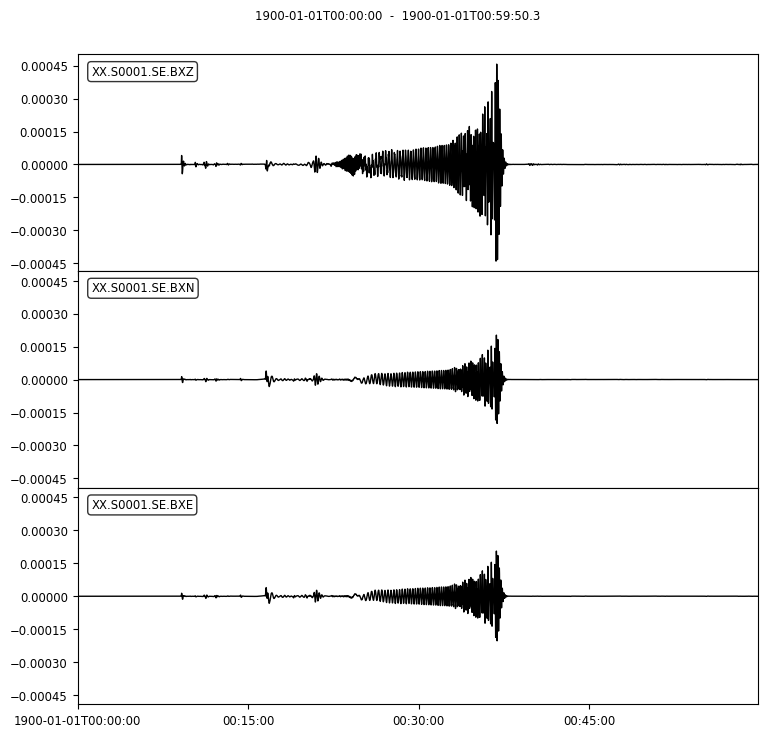

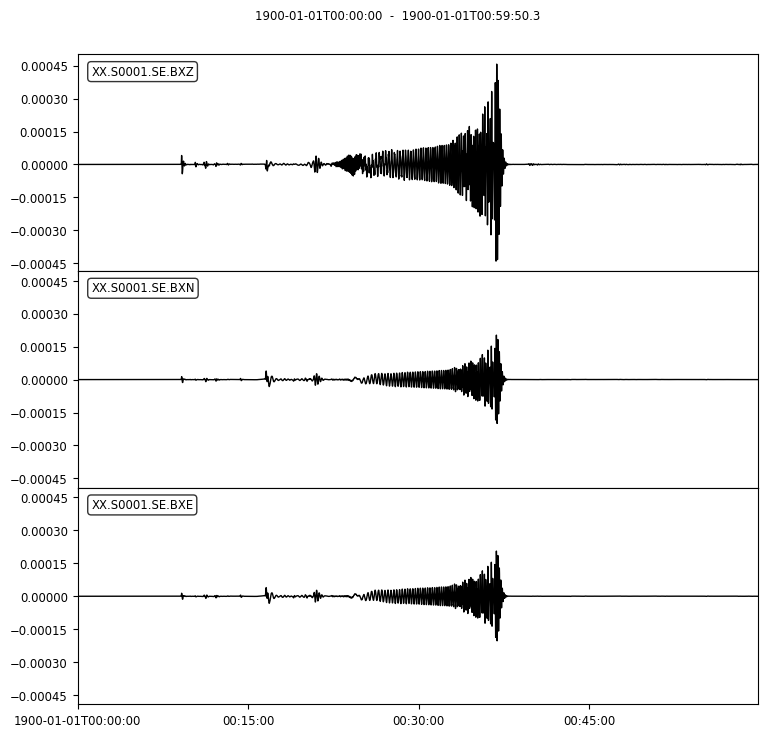

In [25]:
# plot the seismogram
plt.figure(figsize=(20, 6))
seismogram.plot()

### Sinyal Perubahan Suhu

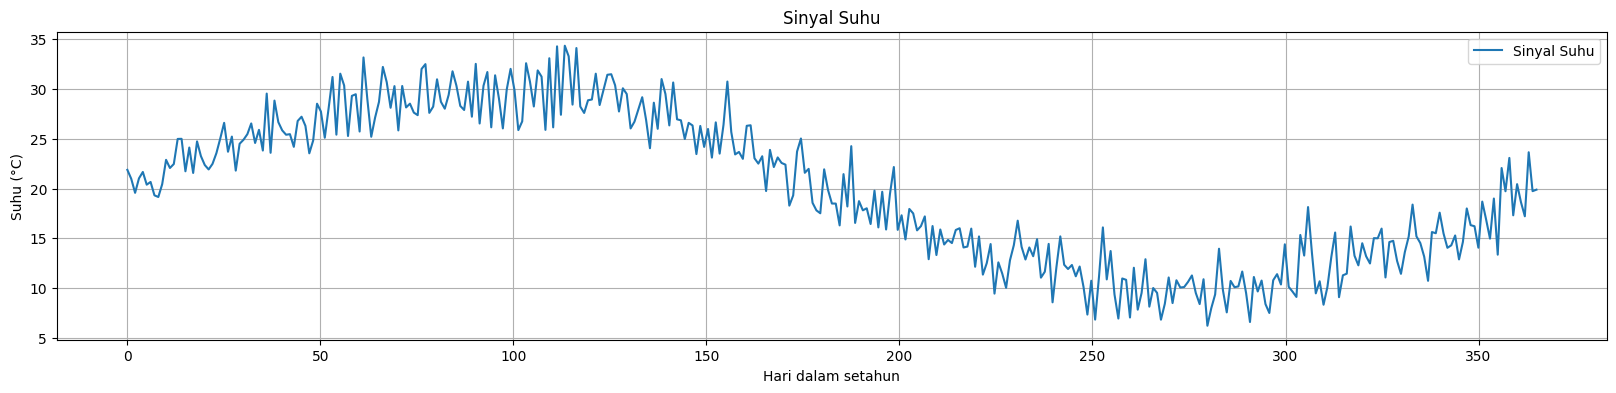

In [26]:
t = np.linspace(0, 365, 365) # data selama 1 tahun

temperature = 20 + 10 * np.sin(2 * np.pi * t / 365) + 2 * np.random.normal(size=t.shape)

# plot
plt.figure(figsize=(20, 4))
plt.plot(t, temperature, label='Sinyal Suhu')
plt.title('Sinyal Suhu')
plt.xlabel('Hari dalam setahun')
plt.ylabel('Suhu (°C)')
plt.grid(True)
plt.legend()
plt.show()

## Sinyal Komunikasi 


### Sinyal Radio AM 

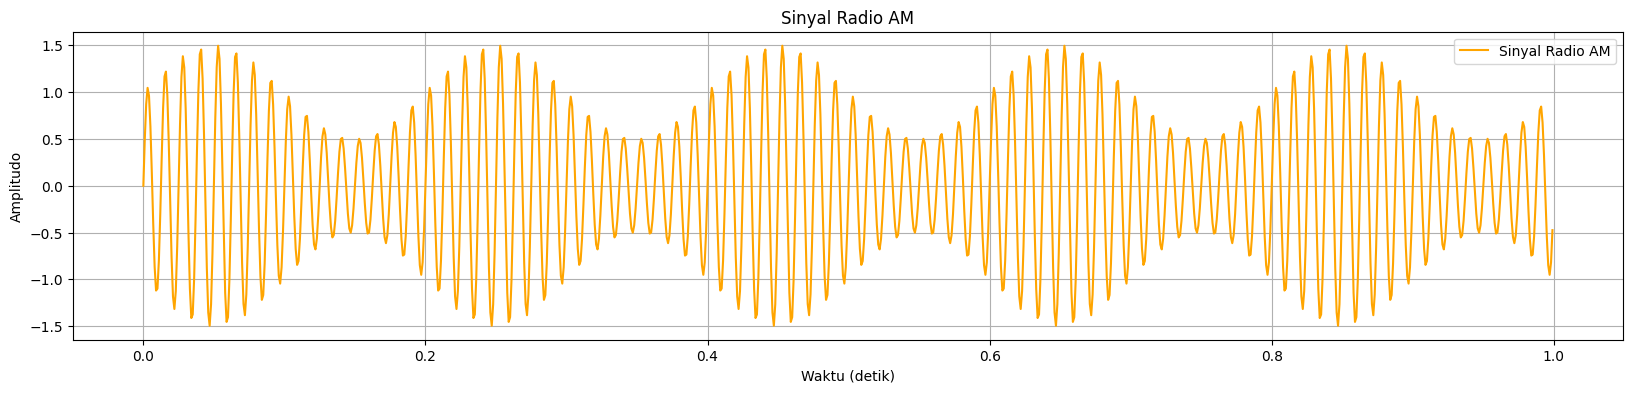

In [28]:
fs = 1000 # Sampling frequency
carrier_freq = 80 # Carrier frequency
modulating_freq = 5 # Modulating frequency

t = np.linspace(0, 1, fs, endpoint=False) # Time vector
carrier = np.sin(2 * np.pi * carrier_freq * t) # Carrier signal
modulating_sinyal = 1 + 0.5 * np.sin(2 * np.pi * modulating_freq * t) # Modulating signal

# Membuat sinyal AM
am_signal = carrier * modulating_sinyal

# plot the AM signal
plt.figure(figsize=(20, 4))
plt.plot(t, am_signal, label='Sinyal Radio AM', color='orange')
plt.title('Sinyal Radio AM')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

### Sinyal Radio FM 

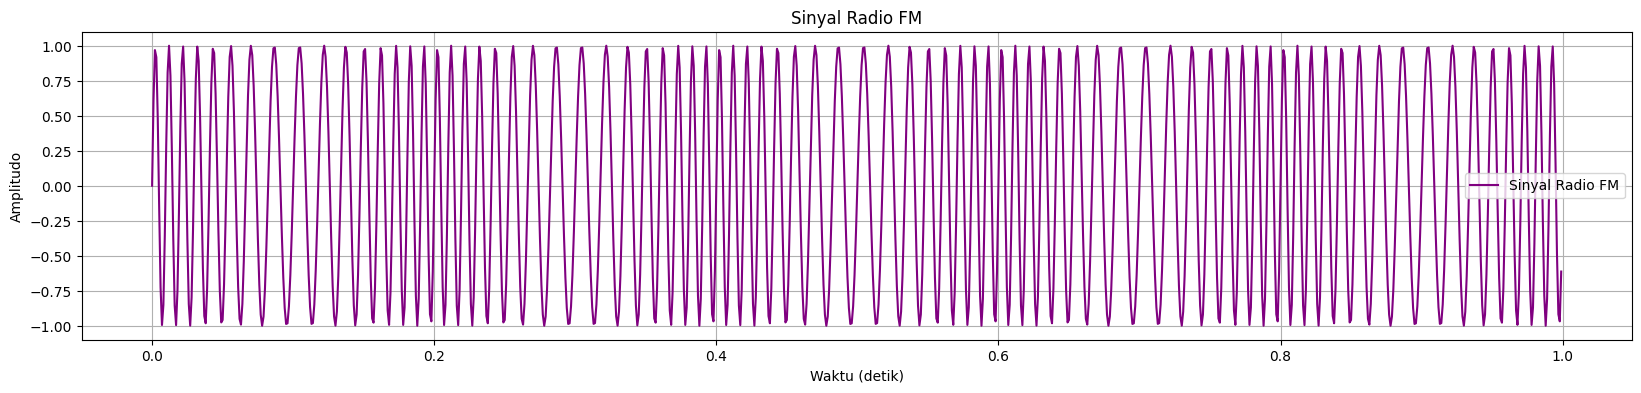

In [29]:
fs = 1000  # Sampling frequency
carrier_freq = 80  # Carrier frequency
modulating_freq = 5  # Modulating frequency

t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
carrier = np.sin(2 * np.pi * carrier_freq * t)  # Carrier signal
modulating_signal = np.sin(2 * np.pi * modulating_freq * t)  # Modulating signal

# Membuat sinyal FM
fm_signal = np.sin(2 * np.pi * carrier_freq * t + 5 * modulating_signal) 

# plot the FM signal
plt.figure(figsize=(20, 4))
plt.plot(t, fm_signal, label='Sinyal Radio FM', color='purple')
plt.title('Sinyal Radio FM')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

## Sinyal Mekanik
### Sinyal Getaran Mekanik

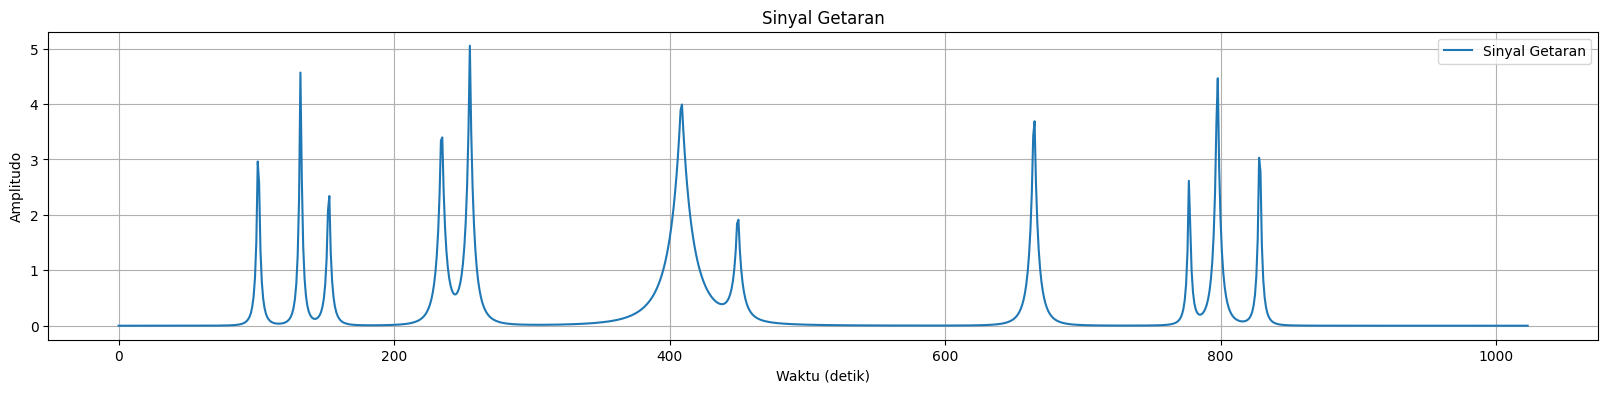

In [30]:
vibration_signal = pywt.data.demo_signal("Bumps", n=1024)

# plot the vibration signal
plt.figure(figsize=(20, 4))
plt.plot(vibration_signal, label='Sinyal Getaran')
plt.title('Sinyal Getaran')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

### Sampling Rate

sampling rate itu adalah tentang mengambil / menangkap sinyal analog ke digital. 
Sehingga dapat di mapping / dibentuk ulang dalam bentuk digital


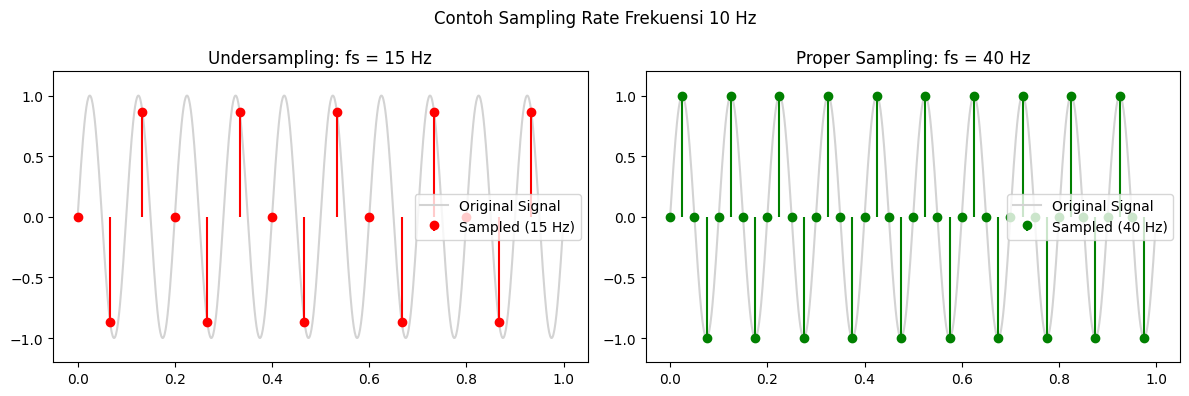

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Sinyal Utama
f_signal = 10  # Frekuensi Sinyal Utama
t_cont = np.linspace(0, 1, 1000, endpoint=False)
x_cont = np.sin(2 * np.pi * f_signal * t_cont)

# Two sampling rates: one below and one above Nyquist rate
fs_low = 15  # Below Nyquist (Nyquist = 2*10 = 20 Hz)
fs_high = 40  # Above Nyquist

def sample_signal(fs, t_max=1):
    t_sampled = np.arange(0, t_max, 1/fs)
    x_sampled = np.sin(2 * np.pi * f_signal * t_sampled)
    return t_sampled, x_sampled

t_low, x_low = sample_signal(fs_low)
t_high, x_high = sample_signal(fs_high)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Undersampling (Aliasing)
axs[0].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[0].stem(t_low, x_low, linefmt='r', markerfmt='ro', basefmt=" ", label='Sampled (15 Hz)')
axs[0].set_title('Undersampling: fs = 15 Hz')
axs[0].legend()
axs[0].set_ylim(-1.2, 1.2)

# Proper sampling (No aliasing)
axs[1].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[1].stem(t_high, x_high, linefmt='g', markerfmt='go', basefmt=" ", label='Sampled (40 Hz)')
axs[1].set_title('Proper Sampling: fs = 40 Hz')
axs[1].legend()
axs[1].set_ylim(-1.2, 1.2)

plt.suptitle("Contoh Sampling Rate Frekuensi 10 Hz")
plt.tight_layout()
plt.show()


## Notes

10 Hz artinya ada 10 titik yang diambil setiap 1 detik

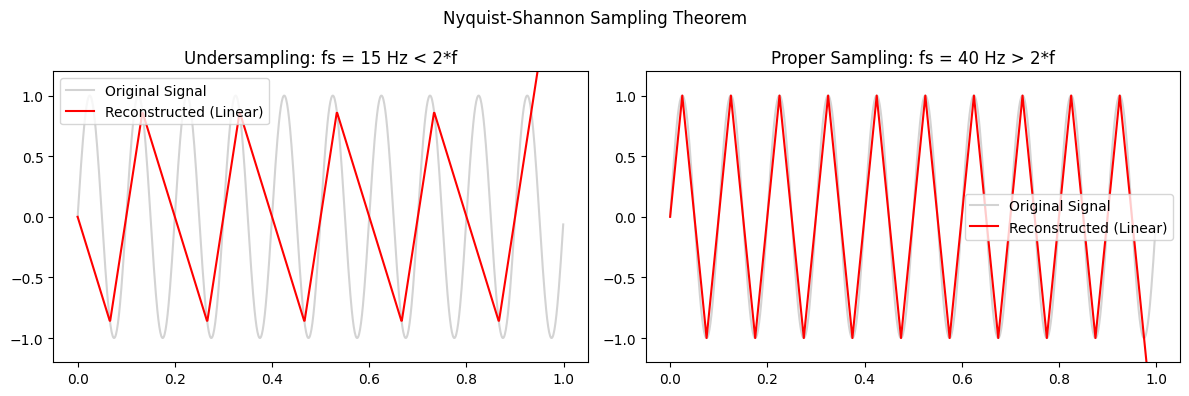

In [32]:
from scipy.interpolate import interp1d

def interpolate_sampled(t_sampled, x_sampled, t_cont):
    """
    Interpolates the sampled signal to match the continuous time vector.
    """
    x_interp = interp1d(t_sampled, x_sampled, kind='linear', fill_value="extrapolate")
    return x_interp(t_cont)

# Interpolate the sampled signals to the continuous time vector
x_low_interp = interpolate_sampled(t_low, x_low, t_cont)
x_high_interp = interpolate_sampled(t_high, x_high, t_cont)

## Plot the Undersampled and Properly Sampled Signals
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Undersampling (Aliasing)
axs[0].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[0].plot(t_cont, x_low_interp, 'r', label='Reconstructed (Linear)')
axs[0].set_title('Undersampling: fs = 15 Hz < 2*f')
axs[0].legend()
axs[0].set_ylim(-1.2, 1.2)

# Proper sampling (No aliasing)
axs[1].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[1].plot(t_cont, x_high_interp, 'r', label='Reconstructed (Linear)')
axs[1].set_title('Proper Sampling: fs = 40 Hz > 2*f')
axs[1].legend()
axs[1].set_ylim(-1.2, 1.2)

plt.suptitle("Nyquist-Shannon Sampling Theorem")
plt.tight_layout()
plt.show()


### Teorema Nyquist Shannon 

Jadi mengapa sinyal kedua itu bisa lebih mirip dengan sinyal original.

Teorema ini menyebutkan bahwa

Untuk dapat membuat sinyal digital yang mirip dengan sinyal analog, `sampling rate` yang harus digunakan yakni seperti berikut

$$
f_{s} = 2 * f_{max}
$$


/var/folders/vs/q00hcf_x0f9ck592bdl65l3m0000gn/T/ipykernel_68226/3190682484.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


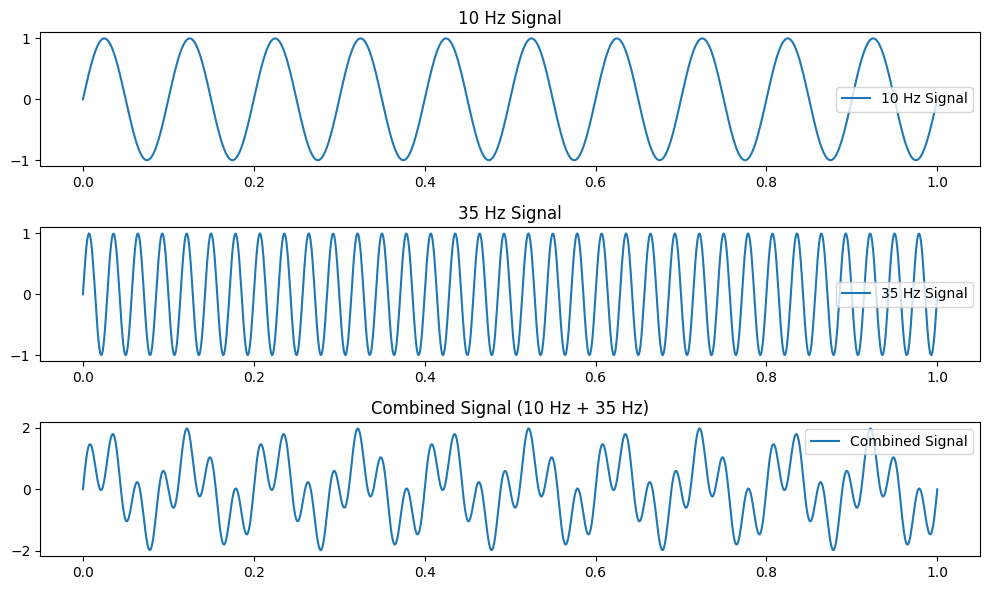

In [34]:
## Example 

## Time sample 
fs = 1000 ## Frekuensi analog
time_axis = np.linspace(0, 1, fs)

## Signals sample
signal_1 = np.sin(2 * np.pi * 10 * time_axis) ## 10 Hz
signal_2 = np.sin(2 * np.pi * 35 * time_axis) ## 35 Hz
signal_combine = signal_1 + signal_2

## Plot the signals

plt, axs = plt.subplots(3, 1, figsize=(10, 6))
axs[0].plot(time_axis, signal_1, label='10 Hz Signal')
axs[0].set_title('10 Hz Signal')
axs[0].legend()

axs[1].plot(time_axis, signal_2, label='35 Hz Signal')
axs[1].set_title('35 Hz Signal')
axs[1].legend()

axs[2].plot(time_axis, signal_combine, label='Combined Signal')
axs[2].set_title('Combined Signal (10 Hz + 35 Hz)')
axs[2].legend()

plt.tight_layout()
plt.show()


## FFT (Fast Fourier Transform)

FFT itu bisa membantu kita buat melihat komponen frekuensi dari pembentuk sinyal

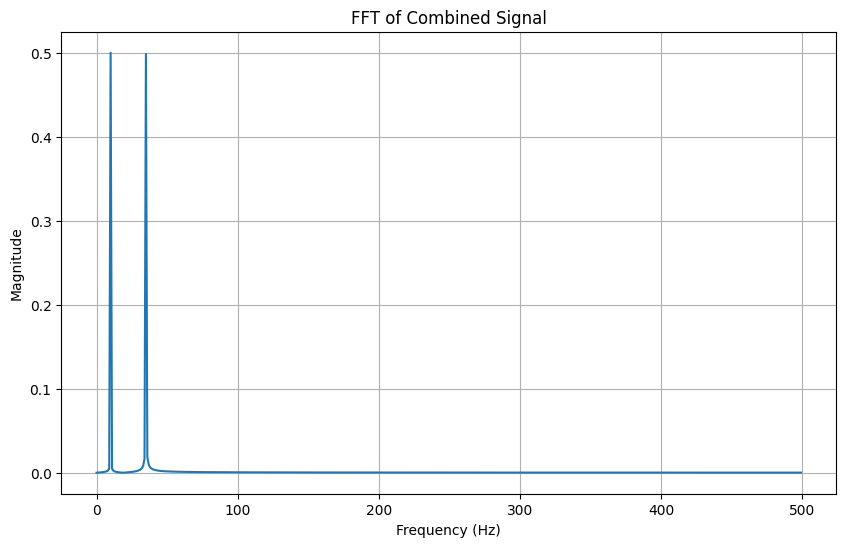

In [39]:
from scipy import fft

import matplotlib.pyplot as plt

# FFT
N = len(signal_combine)  # Number of samples
xf = fft.fftfreq(N, 1 / fs)
yf = np.abs(fft.fft(signal_combine)) / N  # Normalize

## Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(xf[:N//2], yf[:N//2])
plt.title('FFT of Combined Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

## Jadi berdasarkan dari teorema Nyquist.

Untuk membuat sinyal yang mirip dengan sinyal kombinasi, maka minimum sampling rate yang digunakan itu harus 
$$
2 * 35\text{ Hz} = 70
$$

## Resampling

Resampling sendiri itu dibagi menjadi 2
- Upsampling yakni menambah `sampling rate` atau menambah titik-titik yang diisi pada sinyal 
- Downsampling yakni menurunkan `sampling rate` atau mengurang titik-titk yang ada pada sinyal

Biasanya upsampling itu bakal meningkatkan jumlah sampel pada sinyal dan sebaliknya bakal menurunkan jumlah sampel pada downsampling

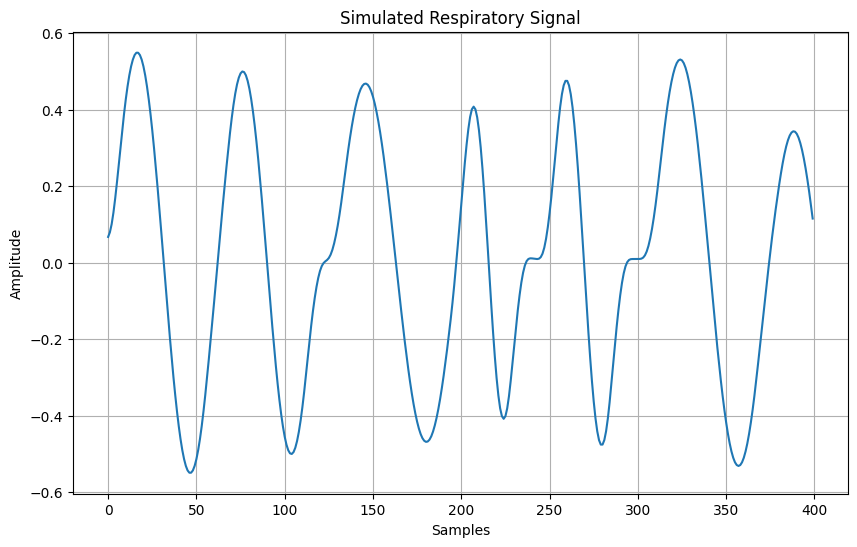

In [40]:
import neurokit2 as nk

fs = 20 ## Sampling rate 20 Hz
time = 20 ## 20 detik

## Duration = 20 detik
## Sampling rate = 20 Hz
## Jumlah sampling = 20 * 20 = 400

resp_signal = nk.rsp_simulate(duration=time, sampling_rate=fs, respiratory_rate=20, noise=0.01, random_state=2024)

## Plot sinyal
plt.figure(figsize=(10, 6))
plt.plot(resp_signal)
plt.title('Simulated Respiratory Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()
plt.show()



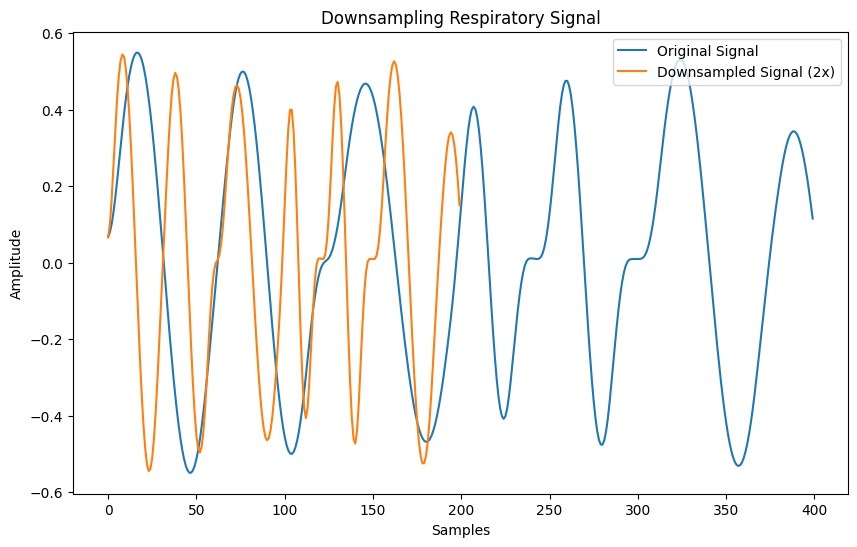

In [41]:
from scipy.signal import decimate, resample

## Downsampling siyal respirasi
downsampling_sinyal_respirasi = decimate(resp_signal, 2) ## Downsampling 2x

## Plot sinyal
plt.figure(figsize=(10, 6))
plt.plot(resp_signal, label='Original Signal')
plt.plot(downsampling_sinyal_respirasi, label='Downsampled Signal (2x)')
plt.title('Downsampling Respiratory Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


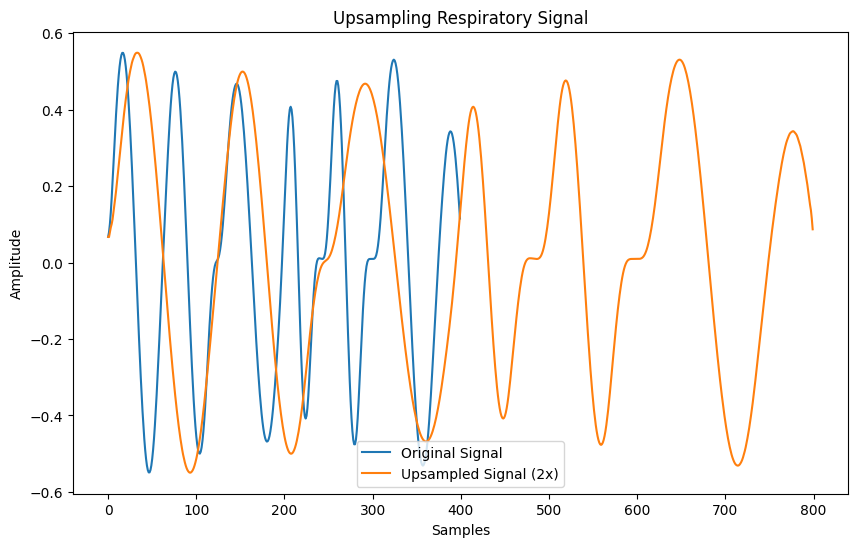

In [42]:
## Upsampling siyal respirasi
upsampling_sinyal_respirasi = resample(resp_signal, 2*len(resp_signal)) ## Upsampling 2x

## Plot sinyal
plt.figure(figsize=(10, 6))
plt.plot(resp_signal, label='Original Signal')
plt.plot(upsampling_sinyal_respirasi, label='Upsampled Signal (2x)')
plt.title('Upsampling Respiratory Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


### jadi secara tidak langsung, 

#### downsampling bakal menurunkan jumlah sampel pada sinyal yang bisa mengartikan 
- sinyal tersebut lebih pendek, 
- lebih sedikit makan storage, 
- lebih cepat juga proses komputasinya
- Akurasinya dari sinyal juga berkurang

#### Upsampling juga ada kelebihan / kekurangan
- Sinyal dari upsampling itu bakal lebih jelas namun bakal lebih panjang juga
- lebih banyak makan storage penyimpanan,
- Proses akurasi lebih lama.

### Use-case dari Downsampling / Upsampling itu

Match nilai dari hasil perhitungan kalian ama nilai ground truth.

Buat sinyal RPPG dari kamera, kamera itu biasanya 30 fps untuk sampling ratenya.

Biasnya untuk membandingkan nilai dari sinyal RPPG dari kamera itu pake Pulse oximeter (sampling rate dari pulse oximeter itu lebih dari 64 Hz)

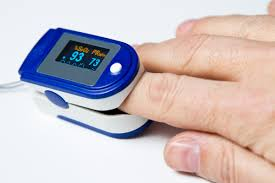

Jadi kalian bakal nge upsampling sinyal rppg kalian atau downsampling sinyal GT biar sama sama pas

## Filtering

Filtering sendiri dalam konteks pengolahan sinyal itu artinya menghilangkan frekuensi yang tidak di inginkan.

Filtering itu ada banyak, namun ada 3 jenis filter yang umum digunakan
- (Lowpass) Melewatkan frekuensi rendah, blok tinggi
- (Highpass) Melewatkan frekuensi tinggi, blok rendah
- (Bandpass) Melewatkan rentang tertentu saja


/var/folders/vs/q00hcf_x0f9ck592bdl65l3m0000gn/T/ipykernel_68226/3996178255.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


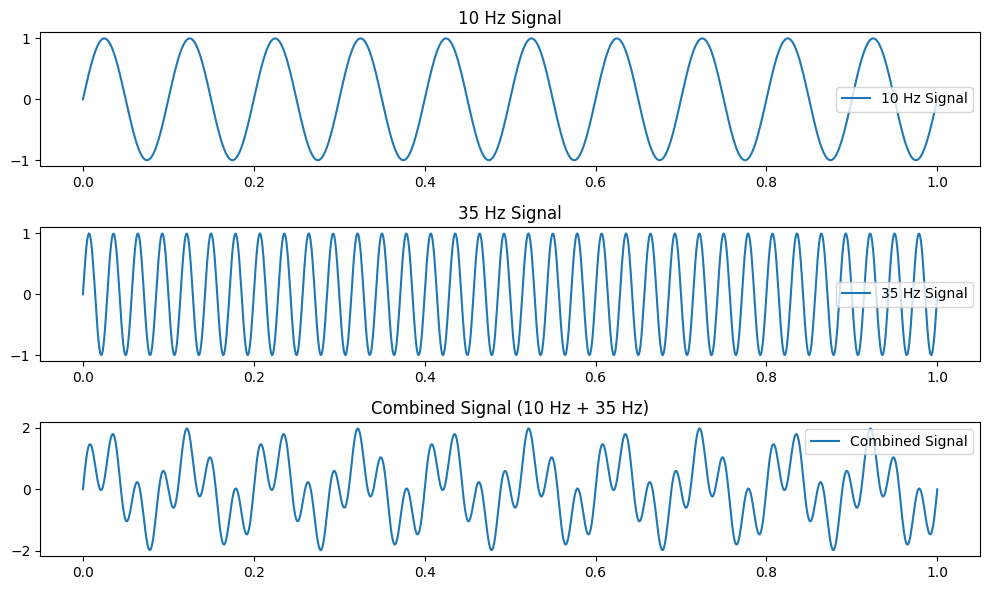

In [44]:
## Example 

## Time sample 
fs = 1000 ## Frekuensi analog
time_axis = np.linspace(0, 1, fs)

## Signals sample
signal_1 = np.sin(2 * np.pi * 10 * time_axis) ## 10 Hz
signal_2 = np.sin(2 * np.pi * 35 * time_axis) ## 35 Hz
signal_combine = signal_1 + signal_2

## Plot the signals

plt, axs = plt.subplots(3, 1, figsize=(10, 6))
axs[0].plot(time_axis, signal_1, label='10 Hz Signal')
axs[0].set_title('10 Hz Signal')
axs[0].legend()

axs[1].plot(time_axis, signal_2, label='35 Hz Signal')
axs[1].set_title('35 Hz Signal')
axs[1].legend()

axs[2].plot(time_axis, signal_combine, label='Combined Signal')
axs[2].set_title('Combined Signal (10 Hz + 35 Hz)')
axs[2].legend()

plt.tight_layout()
plt.show()

## Untuk dapat membuat keputusan mengenai menghapus frekuensi mana dalam filtering, kamu bisa pakai FFT

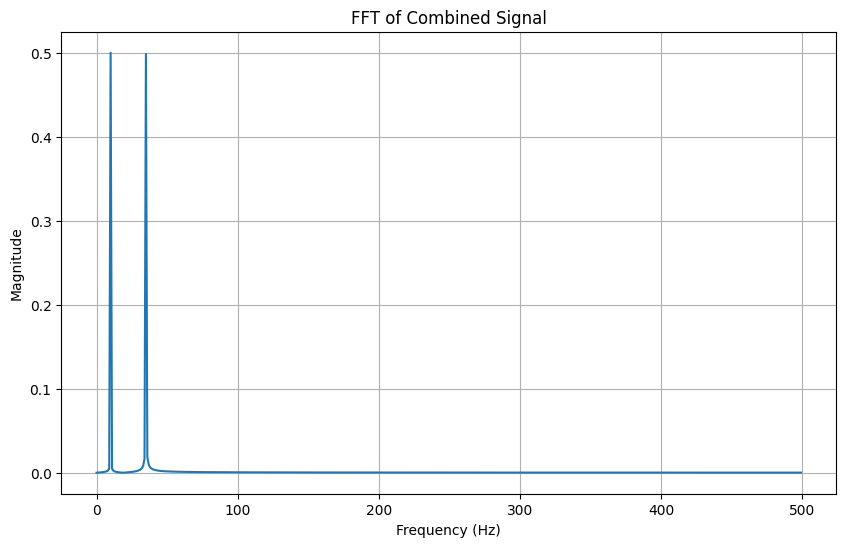

In [46]:
import matplotlib.pyplot as plt

# FFT
N = len(signal_combine)  # Number of samples
xf = fftfreq(N, 1 / fs)
yf = np.abs(fft.fft(signal_combine)) / N  # Normalize

## Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(xf[:N//2], yf[:N//2])
plt.title('FFT of Combined Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

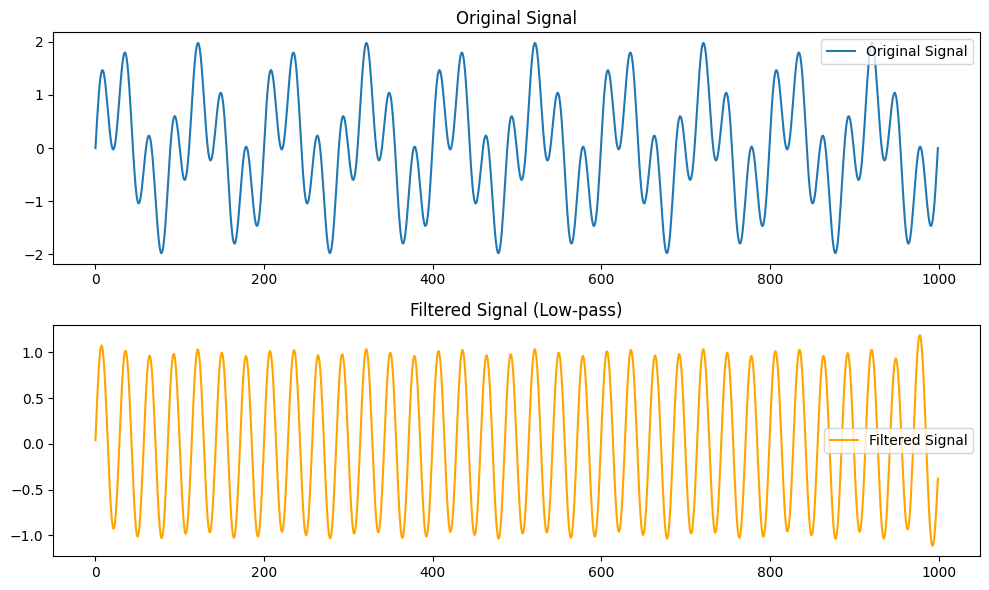

In [47]:
import scipy.signal
from scipy.signal import butter, filtfilt

## Filtering
cutoff = 15  # Cutoff frequency
order = 4  # Filter order
b, a = butter(order, cutoff / (0.5 * fs), btype='high')

## Cutoff itu artinya frekuensi apa yang pengen dibuang / dilewatin
## Order itu seberapa tajam filtering

## Ngeblok semua sinyal dengan frekuensi diatas 15 Hz

filtered_signal = filtfilt(b, a, signal_combine)

## Plot sinyal
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(signal_combine, label='Original Signal')
ax[0].set_title('Original Signal')
ax[0].legend()
ax[1].plot(filtered_signal, label='Filtered Signal', color='orange')
ax[1].set_title('Filtered Signal (Low-pass)')
ax[1].legend()
plt.tight_layout()
plt.show()



## Bagaimana kalau ada rentang filtering 
Misalkan rentang dari [20 - 30], kalian bisa pakai bandpass filter.

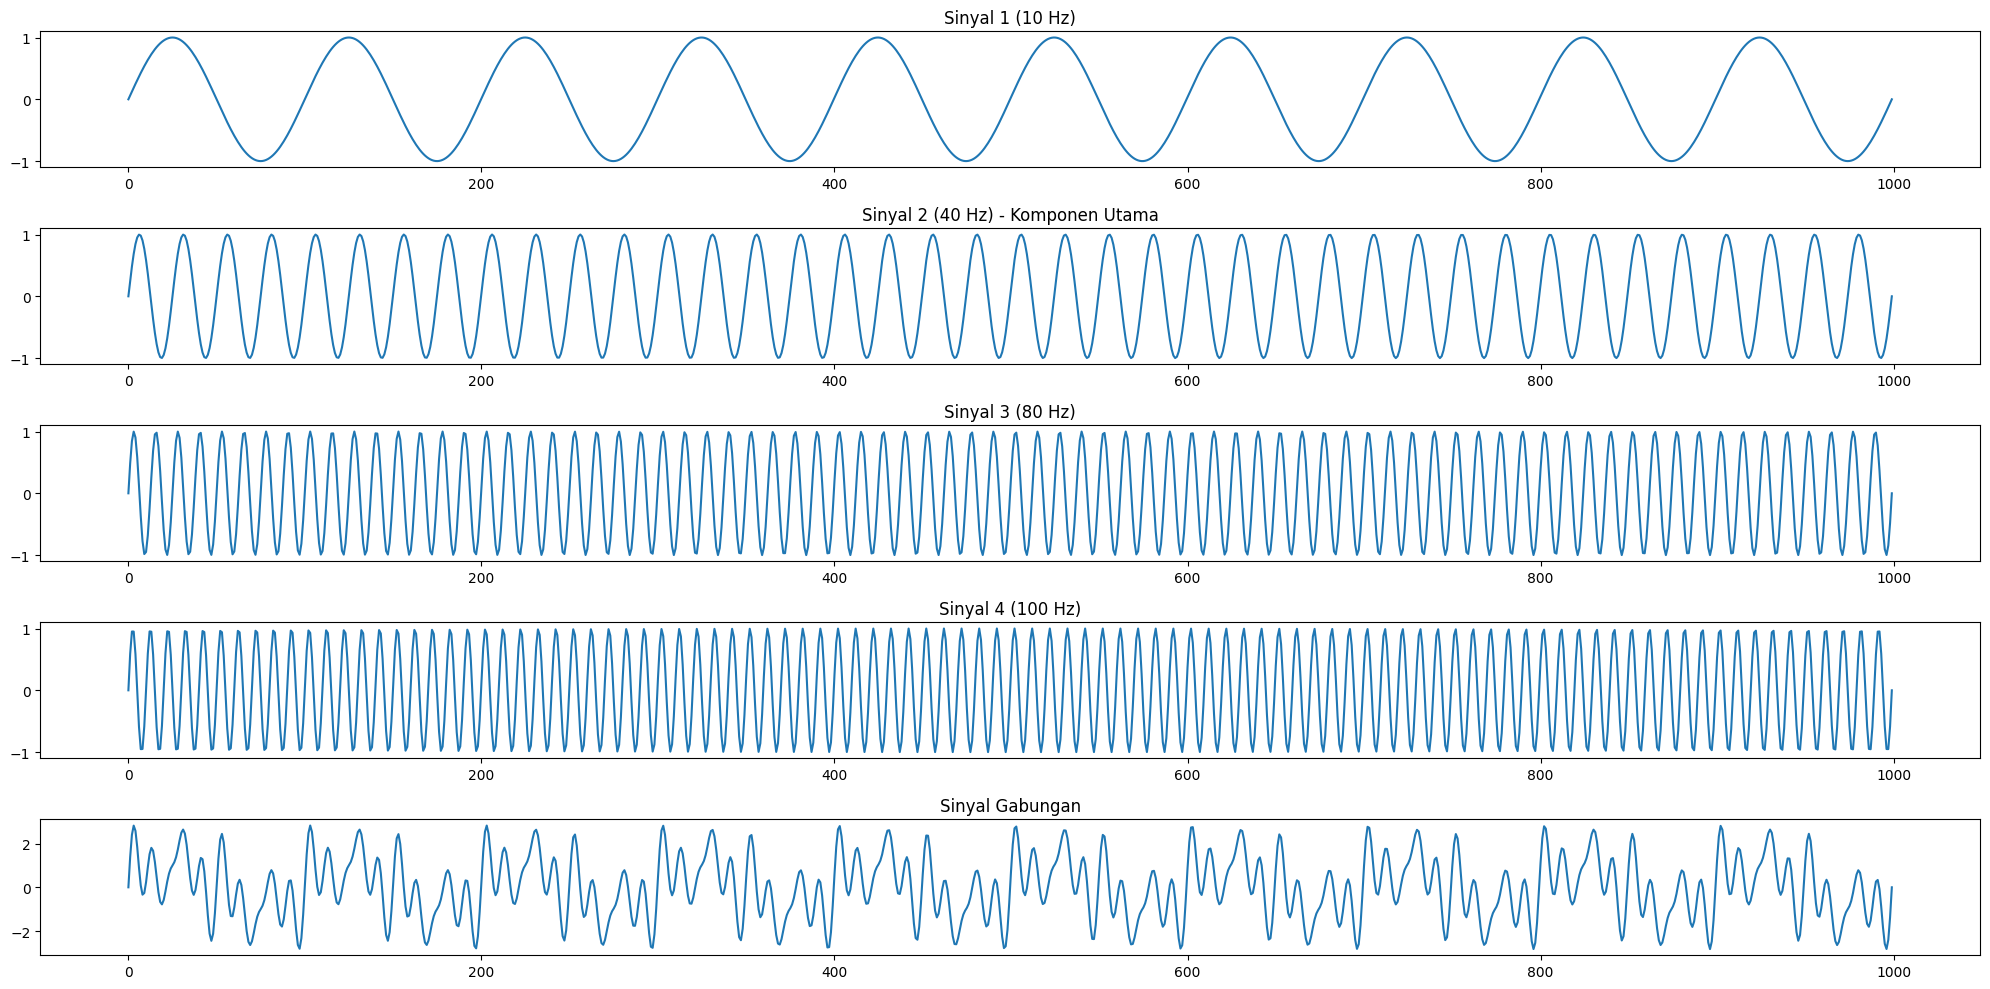

In [48]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

sinyal_1 = np.sin(2 * np.pi * 10 * time_axis) # 10 Hz
sinyal_2 = np.sin(2 * np.pi * 40 * time_axis) # 40 Hz
sinyal_3 = np.sin(2 * np.pi * 80 * time_axis) # 80 Hz
sinyal_4 = np.sin(2 * np.pi * 100 * time_axis) # 100 Hz
sinyal_gabungan = sinyal_1 + sinyal_2 + sinyal_3 + sinyal_4

fig, ax = plt.subplots(5, 1, figsize=(20, 10))
ax[0].plot(sinyal_1)
ax[0].set_title("Sinyal 1 (10 Hz)")
ax[1].plot(sinyal_2)
ax[1].set_title("Sinyal 2 (40 Hz) - Komponen Utama")
ax[2].plot(sinyal_3)
ax[2].set_title("Sinyal 3 (80 Hz)")
ax[3].plot(sinyal_4)
ax[3].set_title("Sinyal 4 (100 Hz)")
ax[4].plot(sinyal_gabungan)
ax[4].set_title("Sinyal Gabungan")
plt.tight_layout()
plt.show()

Misalkan kita ingin menambil sinyal 2 (40 Hz)

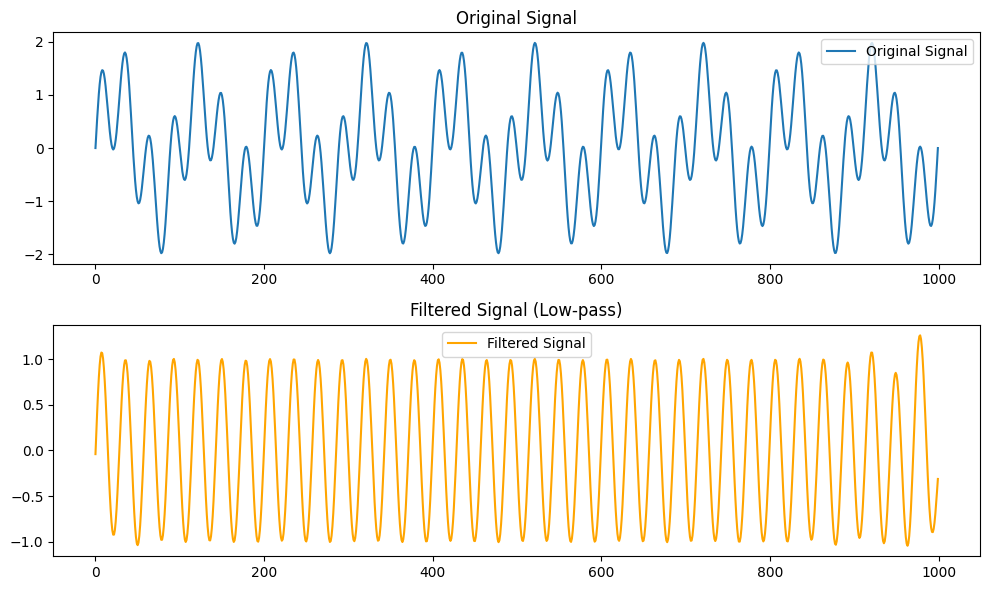

In [49]:
import scipy.signal
from scipy.signal import butter, filtfilt

## Kita block sinyal dibawah 10 Hz dan sinyal diatas 50 hz

## Filtering
low_fq_cutoff = 15  # Low cutoff
high_fq_cutoff = 50  # High cutoff
order = 4  # Filter order
b, a = butter(order, [low_fq_cutoff, high_fq_cutoff], fs=fs, btype='band')

## Cutoff itu artinya frekuensi apa yang pengen dibuang / dilewatin
## Order itu seberapa tajam filtering

filtered_signal = filtfilt(b, a, signal_combine)

## Plot sinyal
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(signal_combine, label='Original Signal')
ax[0].set_title('Original Signal')
ax[0].legend()
ax[1].plot(filtered_signal, label='Filtered Signal', color='orange')
ax[1].set_title('Filtered Signal (Low-pass)')
ax[1].legend()
plt.tight_layout()
plt.show()